In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [48]:
print("Number of CSV files in halfhourly_dataset repository:", len(os.listdir("data\\halfhourly_dataset\\halfhourly_dataset")))

Number of CSV files in halfhourly_dataset repository: 112


In [63]:
CONSUMPTION_DIR = "data\\halfhourly_dataset\\halfhourly_dataset"

allLengthList = []
max = 0
min = 1000000000000000000000000000 # set randomly big numbers as starting point

for file in os.listdir(CONSUMPTION_DIR):
  block = pd.read_csv(f"{CONSUMPTION_DIR}\\{file}", parse_dates=['tstp'])
  datasetLength = block.shape[0]
  allLengthList.append(datasetLength)

  if datasetLength > max:
    max = datasetLength

  if datasetLength < min:
    min = datasetLength

C:\Users\Usrer\AppData\Local\Temp\ipykernel_16944\3899850906.py:9: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  block = pd.read_csv(f"{CONSUMPTION_DIR}\\{file}", parse_dates=['tstp'])
C:\Users\Usrer\AppData\Local\Temp\ipykernel_16944\3899850906.py:9: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  block = pd.read_csv(f"{CONSUMPTION_DIR}\\{file}", parse_dates=['tstp'])
C:\Users\Usrer\AppData\Local\Temp\ipykernel_16944\3899850906.py:9: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  block = pd.read_csv(f"{CONSUMPTION_DIR}\\{file}", parse_dates=['tstp'])
C:\Users\Usrer\AppData\Local\Temp\ipykernel_16944\3899850906.py:9: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  block = pd.read_csv(f"{CONSUMPTION_DIR}\\{file}", parse_dates=['tstp'])
C:\Users\Usrer\AppData\Local\Temp\ip

In [74]:
max(allLengthList)

1730575

In [54]:
weather = pd.read_csv("data\\weather_hourly_darksky.csv", parse_dates=['time'])
weather.head()

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,5.97,104,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
1,4.88,99,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2,3.70,98,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
3,3.12,99,9.23,2011-11-11 03:00:00,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy
4,1.85,111,9.26,2011-11-11 04:00:00,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy


In [7]:
print("Dataset Row:", weather.shape[0])
print("Dataset Column:", weather.shape[1])

Dataset Row: 21165
Dataset Column: 12


In [36]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   visibility           21165 non-null  float64       
 1   windBearing          21165 non-null  int64         
 2   temperature          21165 non-null  float64       
 3   time                 21165 non-null  datetime64[ns]
 4   dewPoint             21165 non-null  float64       
 5   pressure             21152 non-null  float64       
 6   apparentTemperature  21165 non-null  float64       
 7   windSpeed            21165 non-null  float64       
 8   precipType           21165 non-null  object        
 9   icon                 21165 non-null  object        
 10  humidity             21165 non-null  float64       
 11  summary              21165 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(3)
memory usage: 1.9+ MB


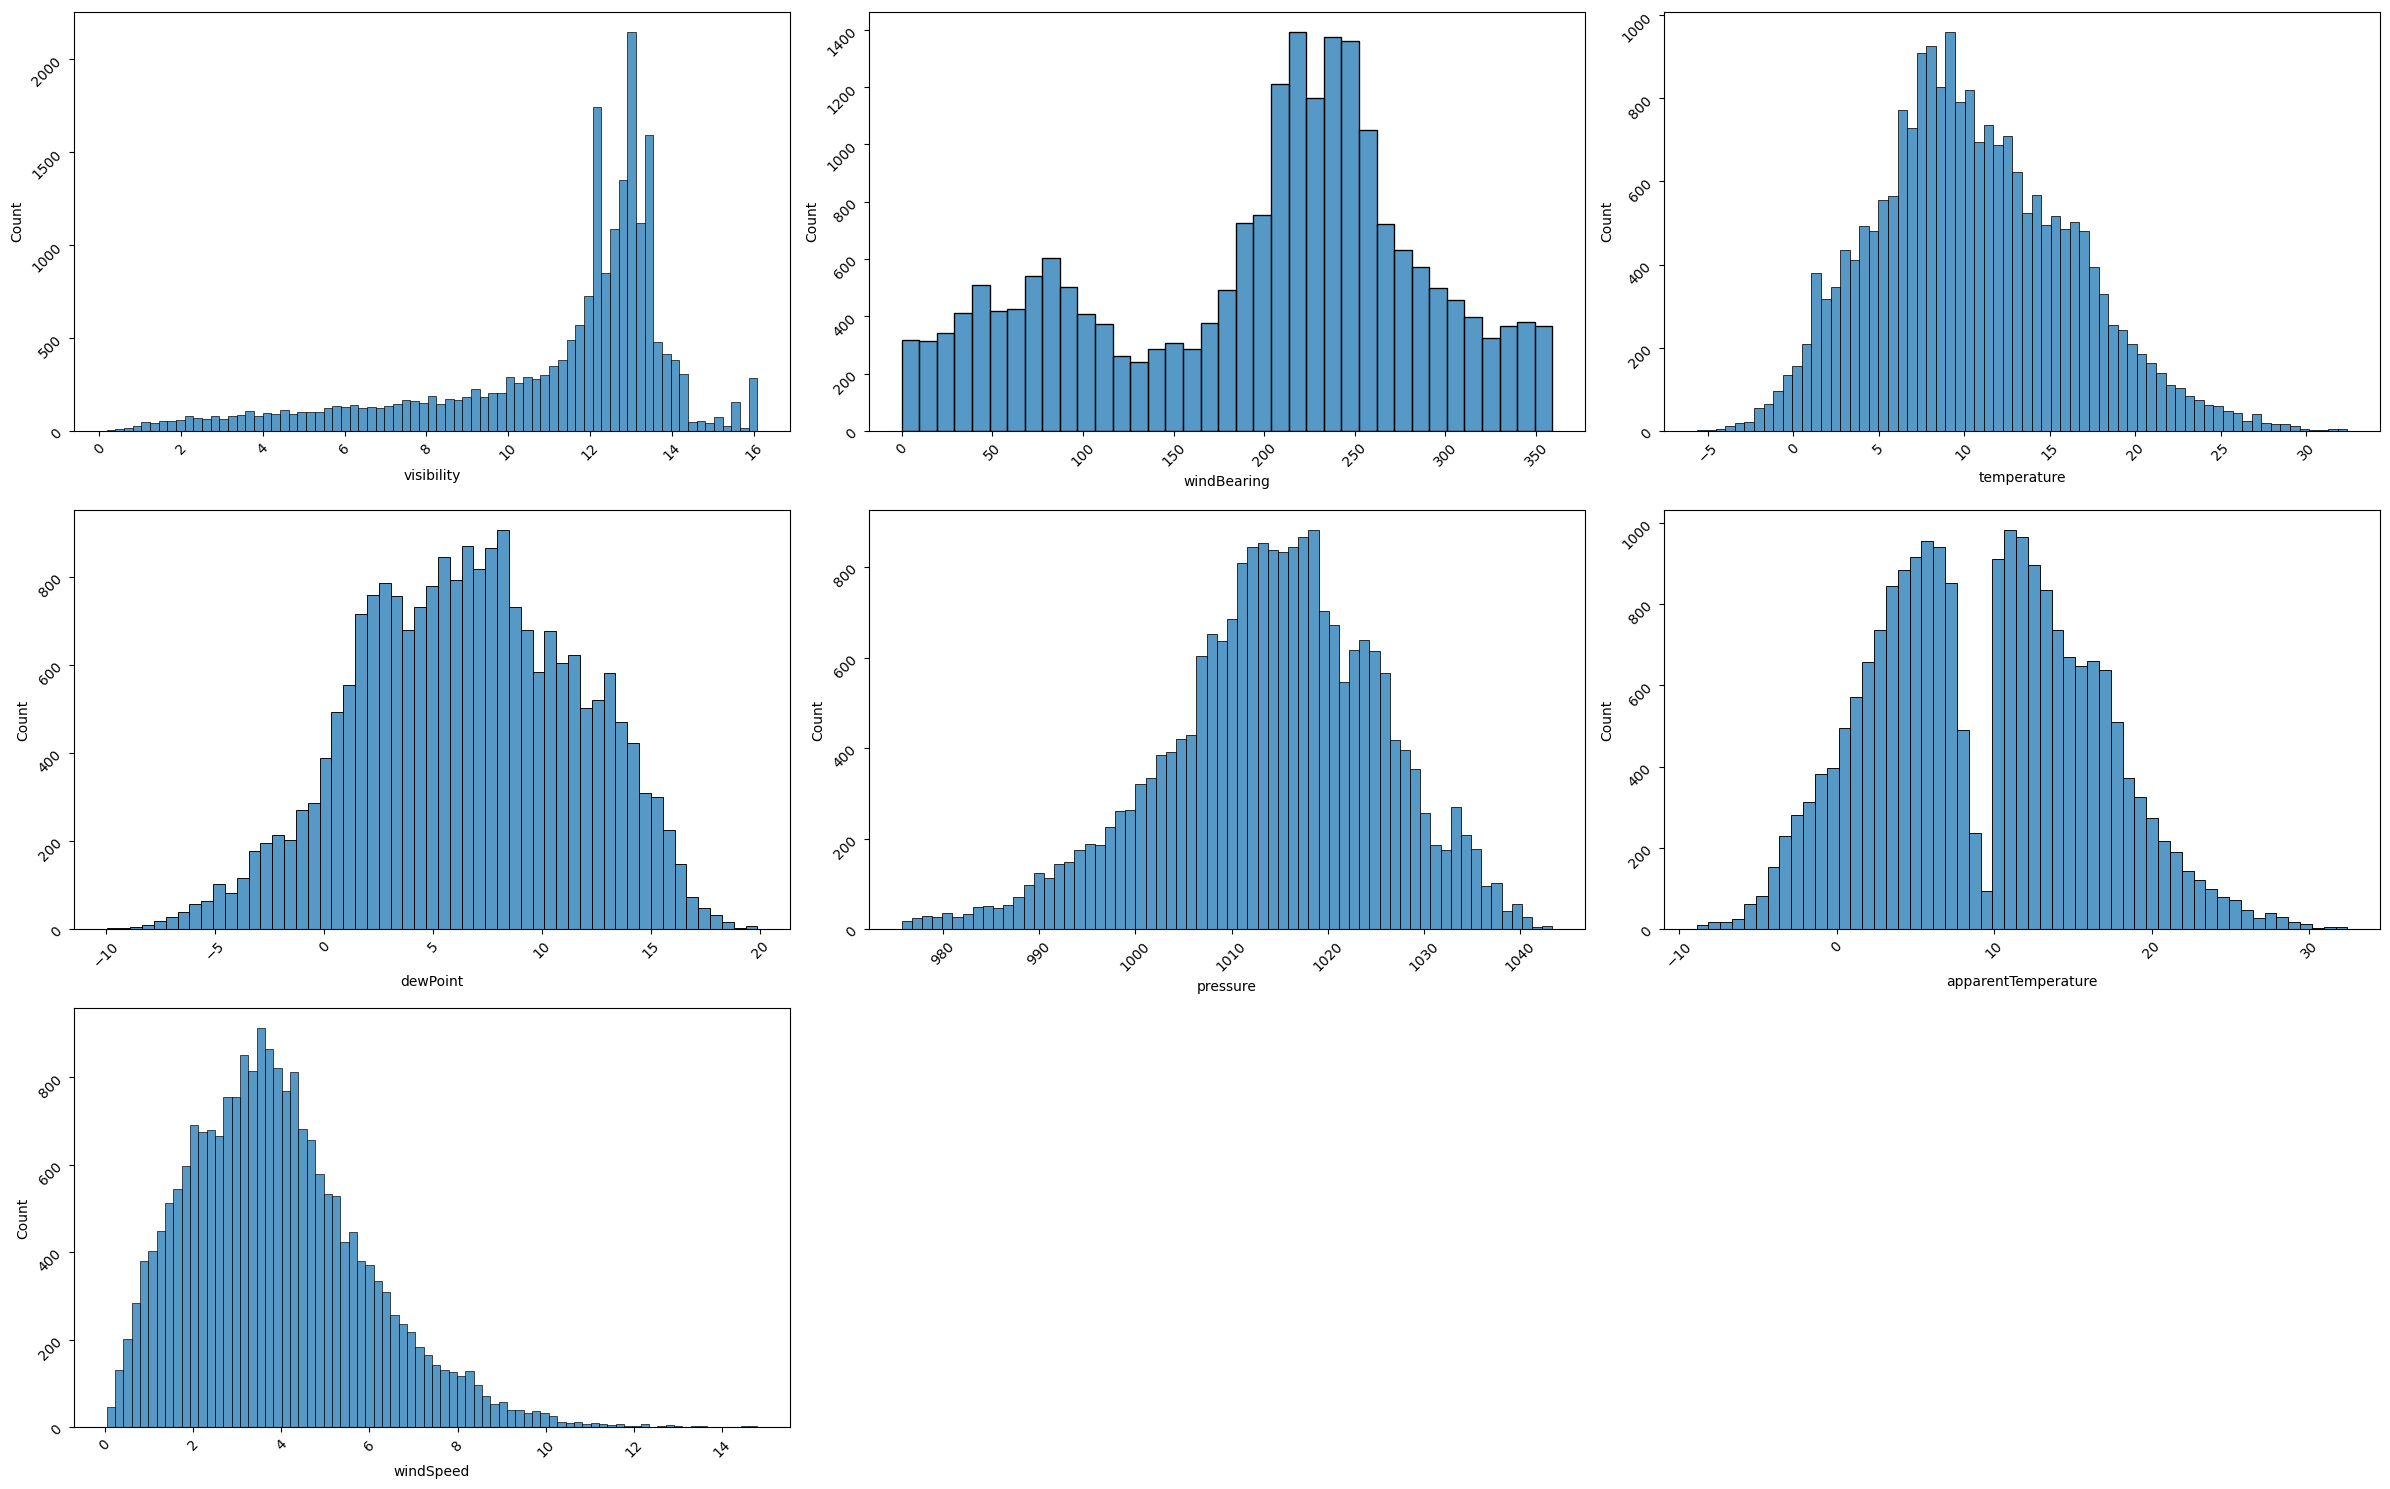

In [40]:
n_rows=3
n_cols=3

numeric_features = [
  'visibility',
  'windBearing',
  'temperature',
  'dewPoint',
  'pressure',
  'apparentTemperature',
  'windSpeed'
]

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_figwidth(24)
fig.set_figheight(15)

for i, column in enumerate(weather[numeric_features]):
  ax = sns.histplot(data=weather, x=column, ax=axes[i//n_cols,i%n_cols])
  ax.tick_params(labelrotation=45)

fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])

plt.tight_layout()

In [44]:
weather.isna().sum()

visibility              0
windBearing             0
temperature             0
time                    0
dewPoint                0
pressure               13
apparentTemperature     0
windSpeed               0
precipType              0
icon                    0
humidity                0
summary                 0
dtype: int64

In [8]:
weather.describe()

,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,humidity
count,21165.000000,21165.000000,21165.000000,21165.000000,21152.000000,21165.000000,21165.000000,21165.000000
mean,11.166485,195.685897,10.471486,6.530501,1014.125153,9.230338,3.905215,0.781829
std,3.099337,90.629453,5.781904,5.041965,11.388337,6.940919,2.026854,0.140369
min,0.180000,0.000000,-5.640000,-9.980000,975.740000,-8.880000,0.040000,0.230000
25%,10.120000,121.000000,6.470000,2.820000,1007.430000,3.900000,2.420000,0.700000
50%,12.260000,217.000000,9.930000,6.570000,1014.780000,9.360000,3.680000,0.810000
75%,13.080000,256.000000,14.310000,10.330000,1022.050000,14.320000,5.070000,0.890000
max,16.090000,359.000000,32.400000,19.880000,1043.320000,32.420000,14.800000,1.000000


In [105]:
weather['precipType'].value_counts(normalize=True)

rain    0.962438
snow    0.037562
Name: precipType, dtype: float64

In [106]:
weather['summary'].value_counts(normalize=True)

Partly Cloudy               0.313631
Mostly Cloudy               0.287975
Clear                       0.272667
Overcast                    0.046256
Foggy                       0.032743
Breezy and Mostly Cloudy    0.018190
Breezy and Partly Cloudy    0.012615
Breezy                      0.009213
Breezy and Overcast         0.003922
Windy and Mostly Cloudy     0.001370
Windy                       0.000850
Windy and Overcast          0.000425
Windy and Partly Cloudy     0.000142
Name: summary, dtype: float64

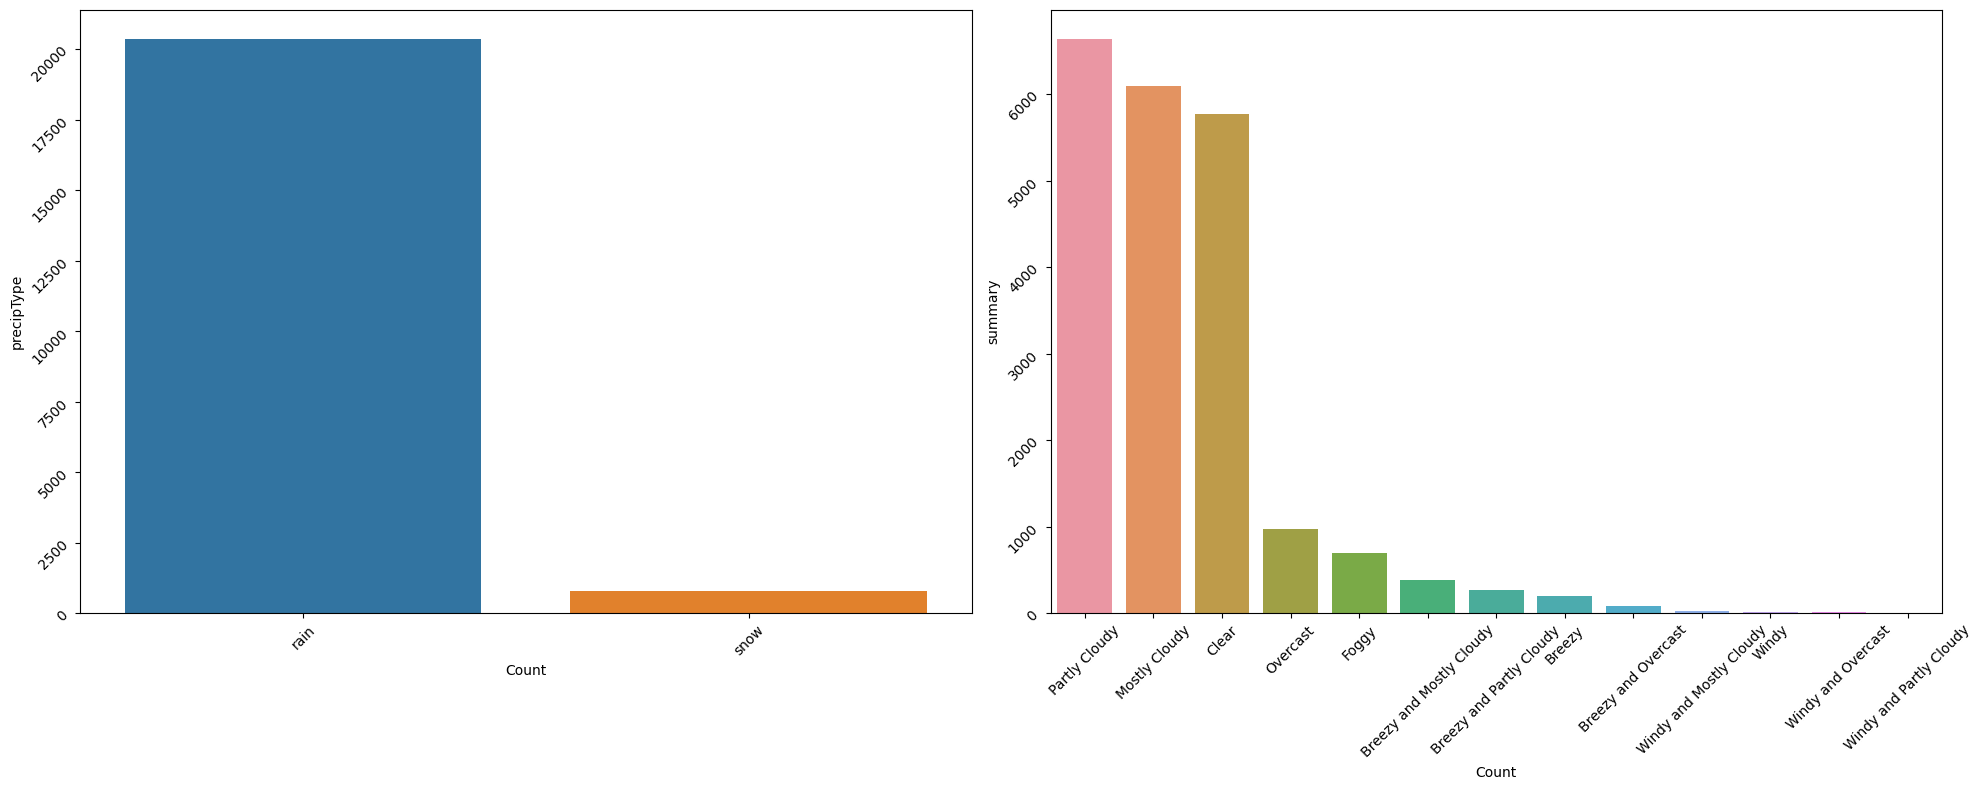

In [104]:
n_rows = 1
n_cols = 2

categorical_features = [
  'precipType',
  'summary'
]

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_figwidth(20)
fig.set_figheight(8)

for i, column in enumerate(weather[categorical_features].columns):
 
  temp = weather[column].value_counts().reset_index()
  ax = sns.barplot(data=temp, x='index', y=column, ax=axes[i])
  ax.set_xlabel('Count')
  ax.tick_params(labelrotation=45)

plt.tight_layout()

In [78]:
acorn = pd.read_csv("data\\acorn_details.csv", encoding='ISO-8859-1')
acorn.head()


,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION,Age,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION,Age,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0


In [107]:
acorn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MAIN CATEGORIES  826 non-null    object 
 1   CATEGORIES       826 non-null    object 
 2   REFERENCE        826 non-null    object 
 3   ACORN-A          826 non-null    float64
 4   ACORN-B          826 non-null    float64
 5   ACORN-C          826 non-null    float64
 6   ACORN-D          826 non-null    float64
 7   ACORN-E          826 non-null    float64
 8   ACORN-F          826 non-null    float64
 9   ACORN-G          826 non-null    float64
 10  ACORN-H          826 non-null    float64
 11  ACORN-I          826 non-null    float64
 12  ACORN-J          826 non-null    float64
 13  ACORN-K          826 non-null    float64
 14  ACORN-L          826 non-null    float64
 15  ACORN-M          826 non-null    float64
 16  ACORN-N          826 non-null    float64
 17  ACORN-O         

In [111]:
info = pd.read_csv("data\\informations_households.csv")
info.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [115]:
print("Dataset Row:", info.shape[0])
print("Dataset Column:", info.shape[1])

Dataset Row: 5566
Dataset Column: 5


In [2]:
holiday = pd.read_csv("data\\uk_bank_holidays.csv", parse_dates=['Bank holidays'])
holiday.head(10)

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
4,2012-04-06,Spring bank holiday (substitute day)
5,2012-07-05,Early May bank holiday
6,2012-09-04,Easter Monday
7,2012-06-04,Good Friday
8,2012-02-01,New Year?s Day (substitute day)
9,2013-12-26,Boxing Day


In [3]:
print("Dataset Row:", holiday.shape[0])
print("Dataset Column:", holiday.shape[1])

Dataset Row: 25
Dataset Column: 2
